In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pycaret
import warnings
import jinja2

from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import *
from pycaret.regression import *

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

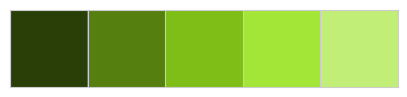

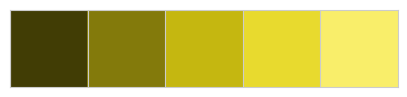

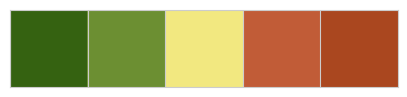

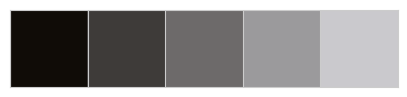

In [2]:
olive_grad = ['#2A3F07', '#557F0F', '#7FBE17', '#A4E637', '#C1EE76']
yellow_grad = ['#413D05', '#837A0B', '#C5B710', '#E8DA2E', '#F9EE6A']
color_mix = ['#356211', '#6C8F32', '#F2E880', '#C15C37', '#AA471F']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

sns.palplot(olive_grad)
sns.palplot(yellow_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [3]:
ds = pd.read_csv('avocado.csv')
(ds.head()
 .style
 .hide(axis="index")
 .background_gradient(cmap='Greens')
 .set_properties(**{'font-family': 'Segoe UI'})
)

Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.330000,64236.620000,1036.740000,54454.850000,48.160000,8696.870000,8603.620000,93.250000,0.000000,conventional,2015,Albany
1,2015-12-20,1.350000,54876.980000,674.280000,44638.810000,58.330000,9505.560000,9408.070000,97.490000,0.000000,conventional,2015,Albany
2,2015-12-13,0.930000,118220.220000,794.700000,109149.670000,130.500000,8145.350000,8042.210000,103.140000,0.000000,conventional,2015,Albany
3,2015-12-06,1.080000,78992.150000,1132.000000,71976.410000,72.580000,5811.160000,5677.400000,133.760000,0.000000,conventional,2015,Albany
4,2015-11-29,1.280000,51039.600000,941.480000,43838.390000,75.780000,6183.950000,5986.260000,197.690000,0.000000,conventional,2015,Albany


In [4]:
print('Total Rows:', ds.shape[0])
print('Total Columns:', ds.shape[1])
print('\n')
ds.info(memory_usage = False)

Total Rows: 18249
Total Columns: 14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)

****************************************
.: Total Avocado based on each Type :.
****************************************


type
conventional    9126
organic         9123
Name: count, dtype: int64

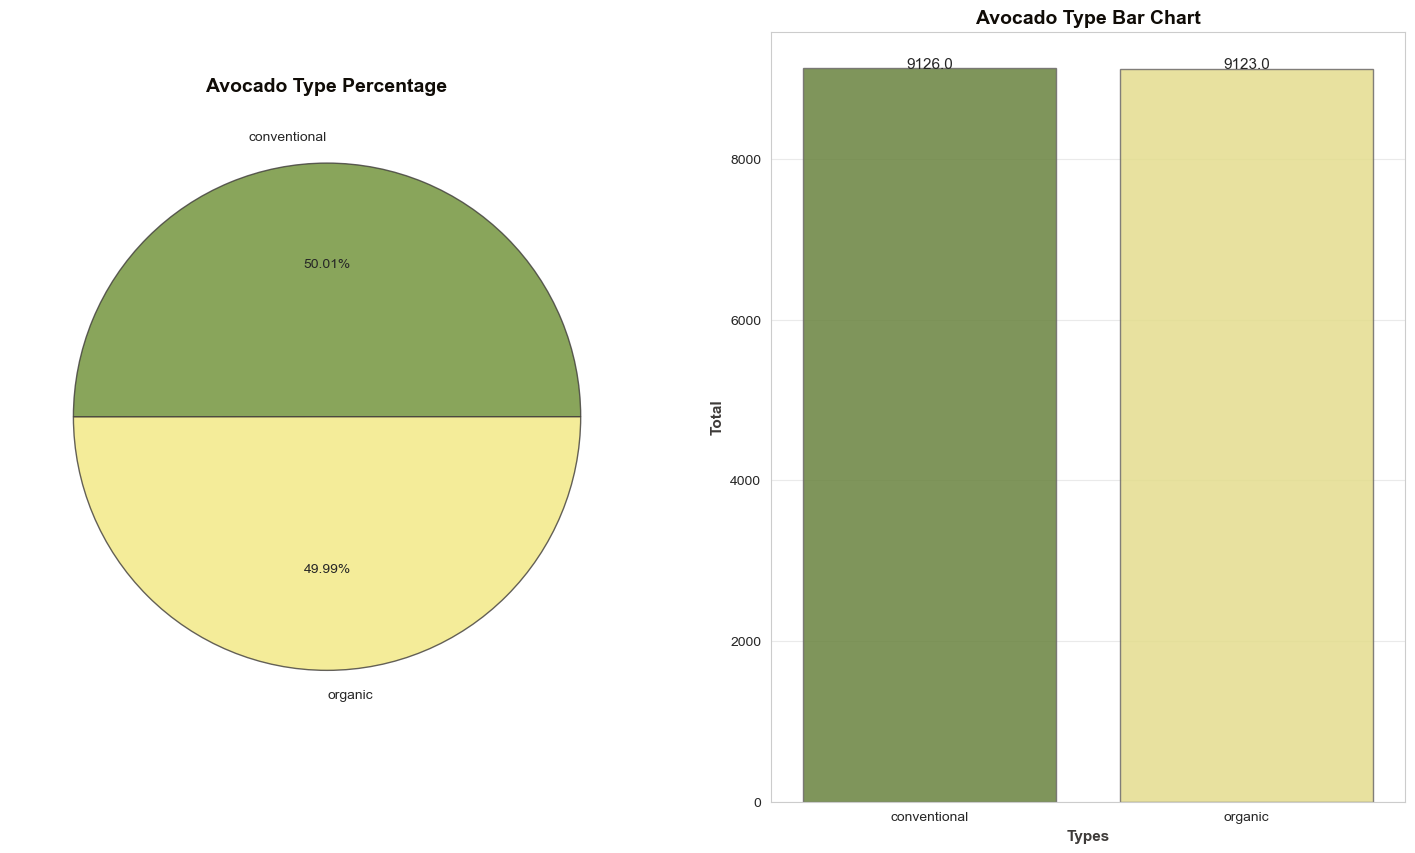

In [5]:
colors = color_mix[1:3]
labels = ds['type'].dropna().unique()
order = ds['type'].value_counts().index

plt.figure(figsize=(18, 10))

#Pie chart
plt.subplot(1, 2, 1)
plt.title('Avocado Type Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', 
          color = black_grad[0])
plt.pie(ds['type'].value_counts(), labels = order, colors = colors, 
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%')

#Bar Chart
countplt = plt.subplot(1, 2, 2)
plt.title('Avocado Type Bar Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
ax = sns.countplot(x = 'type', data = ds, palette = colors, order = order, edgecolor = black_grad[2], alpha = 0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+0.75,rect.get_height(), horizontalalignment = 'center', 
             fontsize = 11)

plt.xlabel('Types', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
countplt

print('\033[92m'+'*' * 40)
print('\033[92m\033[1m'+'.: Total Avocado based on each Type :.'+'\033[0m')
print('\033[92m'+'*' * 40+'\033[0m')
ds.type.value_counts(dropna=False)

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

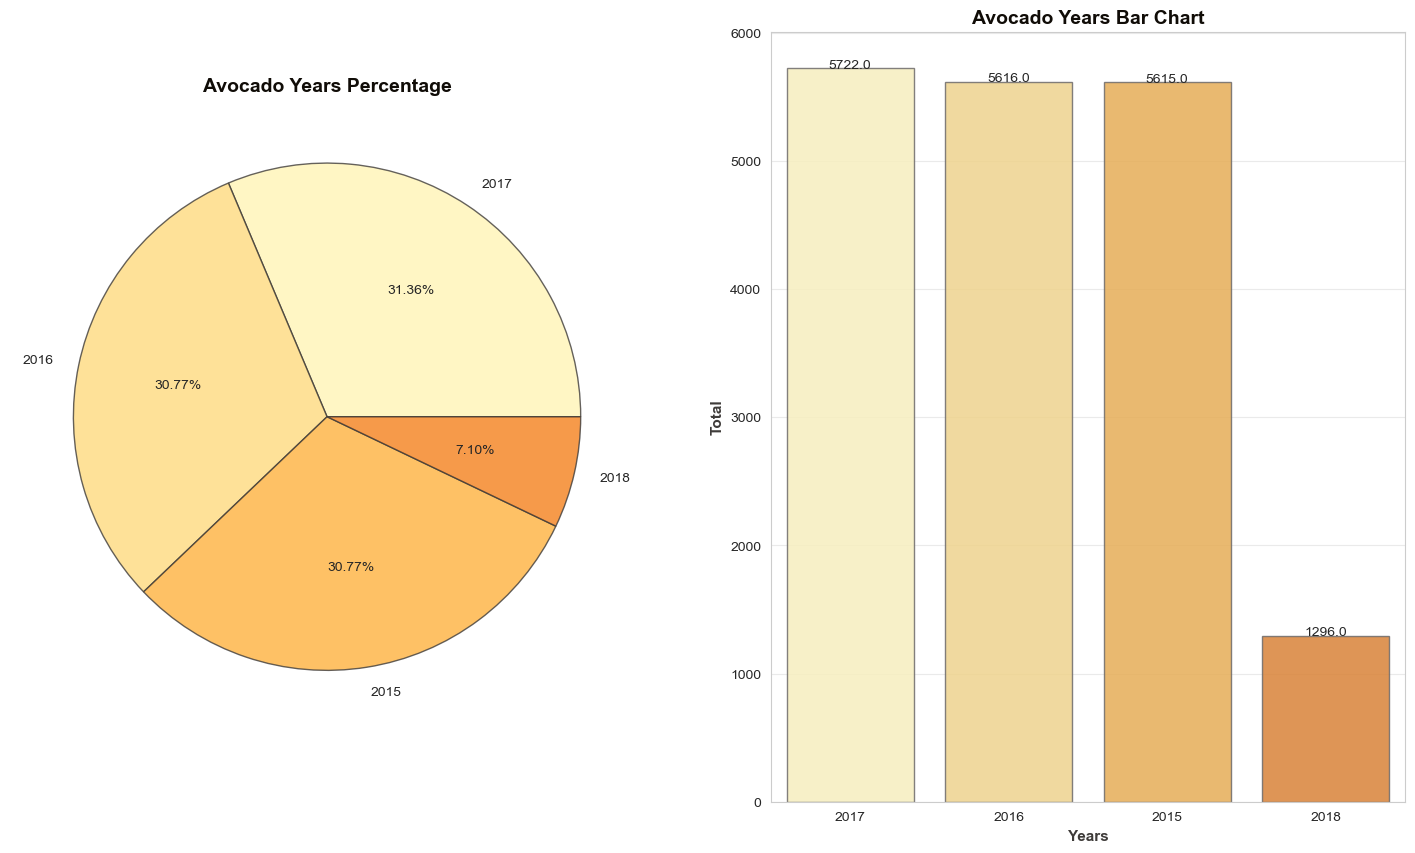

In [6]:
colors = sns.color_palette('YlOrBr')
labels = ds['year'].dropna().unique()
order = ds['year'].value_counts().index

plt.figure(figsize=(18,10))

# Pie Chart
plt.subplot(1,2,1)
plt.title('Avocado Years Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
plt.pie(ds['year'].value_counts(), labels = order, colors = colors, 
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%')

# Bar Chart 
countplt = plt.subplot(1,2,2)
plt.title('Avocado Years Bar Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
ax = sns.countplot(x = 'year', data = ds, palette = colors, order = order, edgecolor = black_grad[2], alpha = 0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+0.75,rect.get_height(), horizontalalignment = 'center',
             fontsize = 10)

plt.xlabel('Years', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
countplt

ds.year.value_counts(dropna=False)

In [7]:
ds.region.value_counts(dropna=False)

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

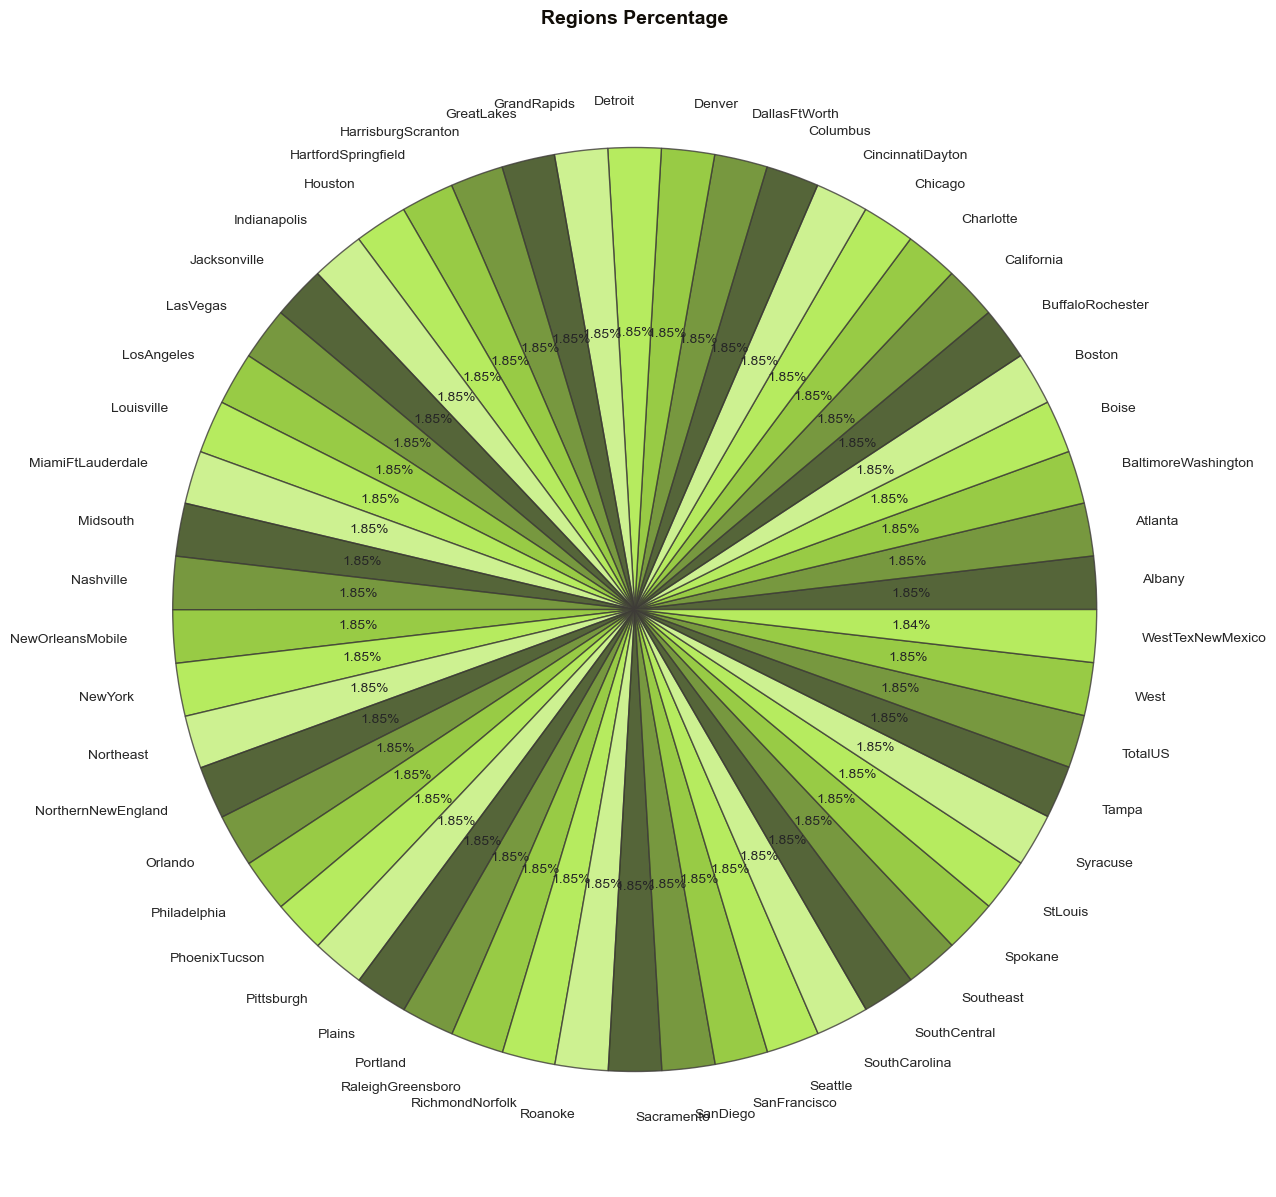

In [8]:
colors = olive_grad[0:5]
labels = ds['region'].dropna().unique()
order = ds['region'].value_counts().index

plt.figure(figsize = (15, 15))
plt.title('Regions Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
plt.pie(ds['region'].value_counts(), labels = order, colors = colors, 
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]),autopct = '%.2f%%');

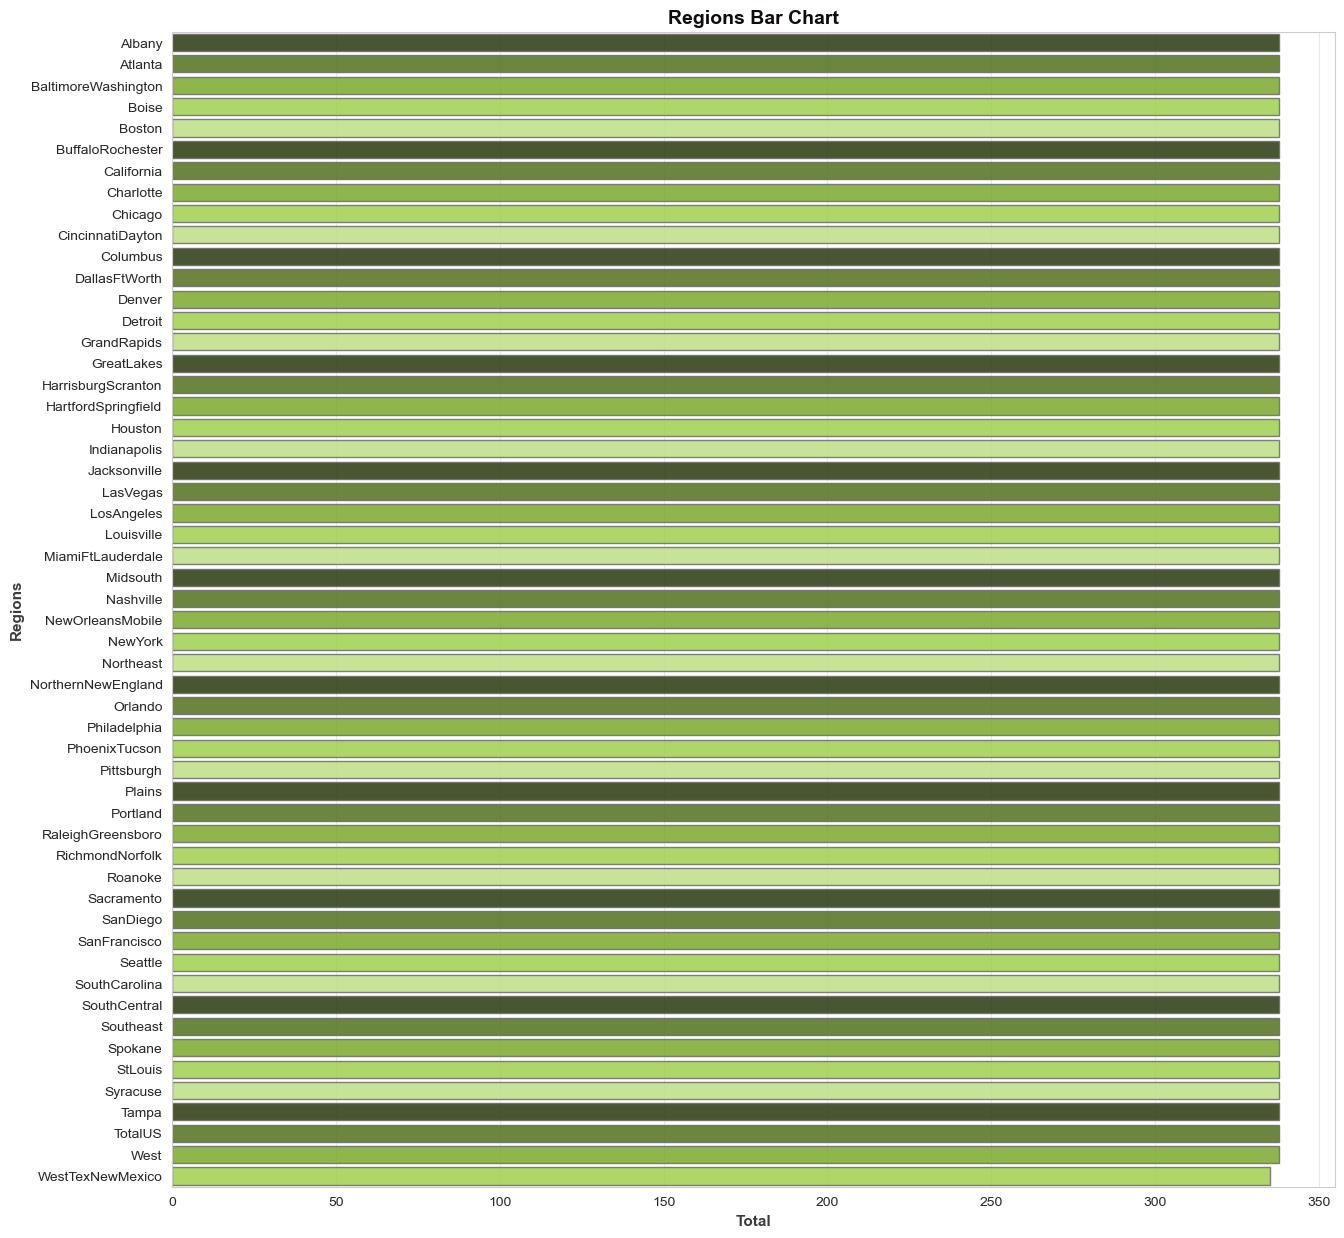

In [9]:
plt.figure(figsize = (15, 15))
plt.title('Regions Bar Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
sns.countplot(y = 'region', data = ds, order = order, palette = colors, edgecolor = black_grad[2], alpha = 0.85)
plt.xlabel('Total', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Regions', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'x', alpha = 0.4);

In [10]:
ds[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 
    'XLarge Bags']].describe().T.style.background_gradient(cmap='YlOrBr').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.000000,1.405978,0.402677,0.440000,1.100000,1.370000,1.660000,3.250000
Total Volume,18249.000000,850644.013009,3453545.355399,84.560000,10838.580000,107376.760000,432962.290000,62505646.520000
4046,18249.000000,293008.424531,1264989.081763,0.000000,854.070000,8645.300000,111020.200000,22743616.170000
4225,18249.000000,295154.568356,1204120.401135,0.000000,3008.780000,29061.020000,150206.860000,20470572.610000
4770,18249.000000,22839.735993,107464.068435,0.000000,0.000000,184.990000,6243.420000,2546439.110000
Total Bags,18249.000000,239639.202060,986242.399216,0.000000,5088.640000,39743.830000,110783.370000,19373134.370000
Small Bags,18249.000000,182194.686696,746178.514962,0.000000,2849.420000,26362.820000,83337.670000,13384586.800000
Large Bags,18249.000000,54338.088145,243965.964547,0.000000,127.470000,2647.710000,22029.250000,5719096.610000
XLarge Bags,18249.000000,3106.426507,17692.894652,0.000000,0.000000,0.000000,132.500000,551693.650000


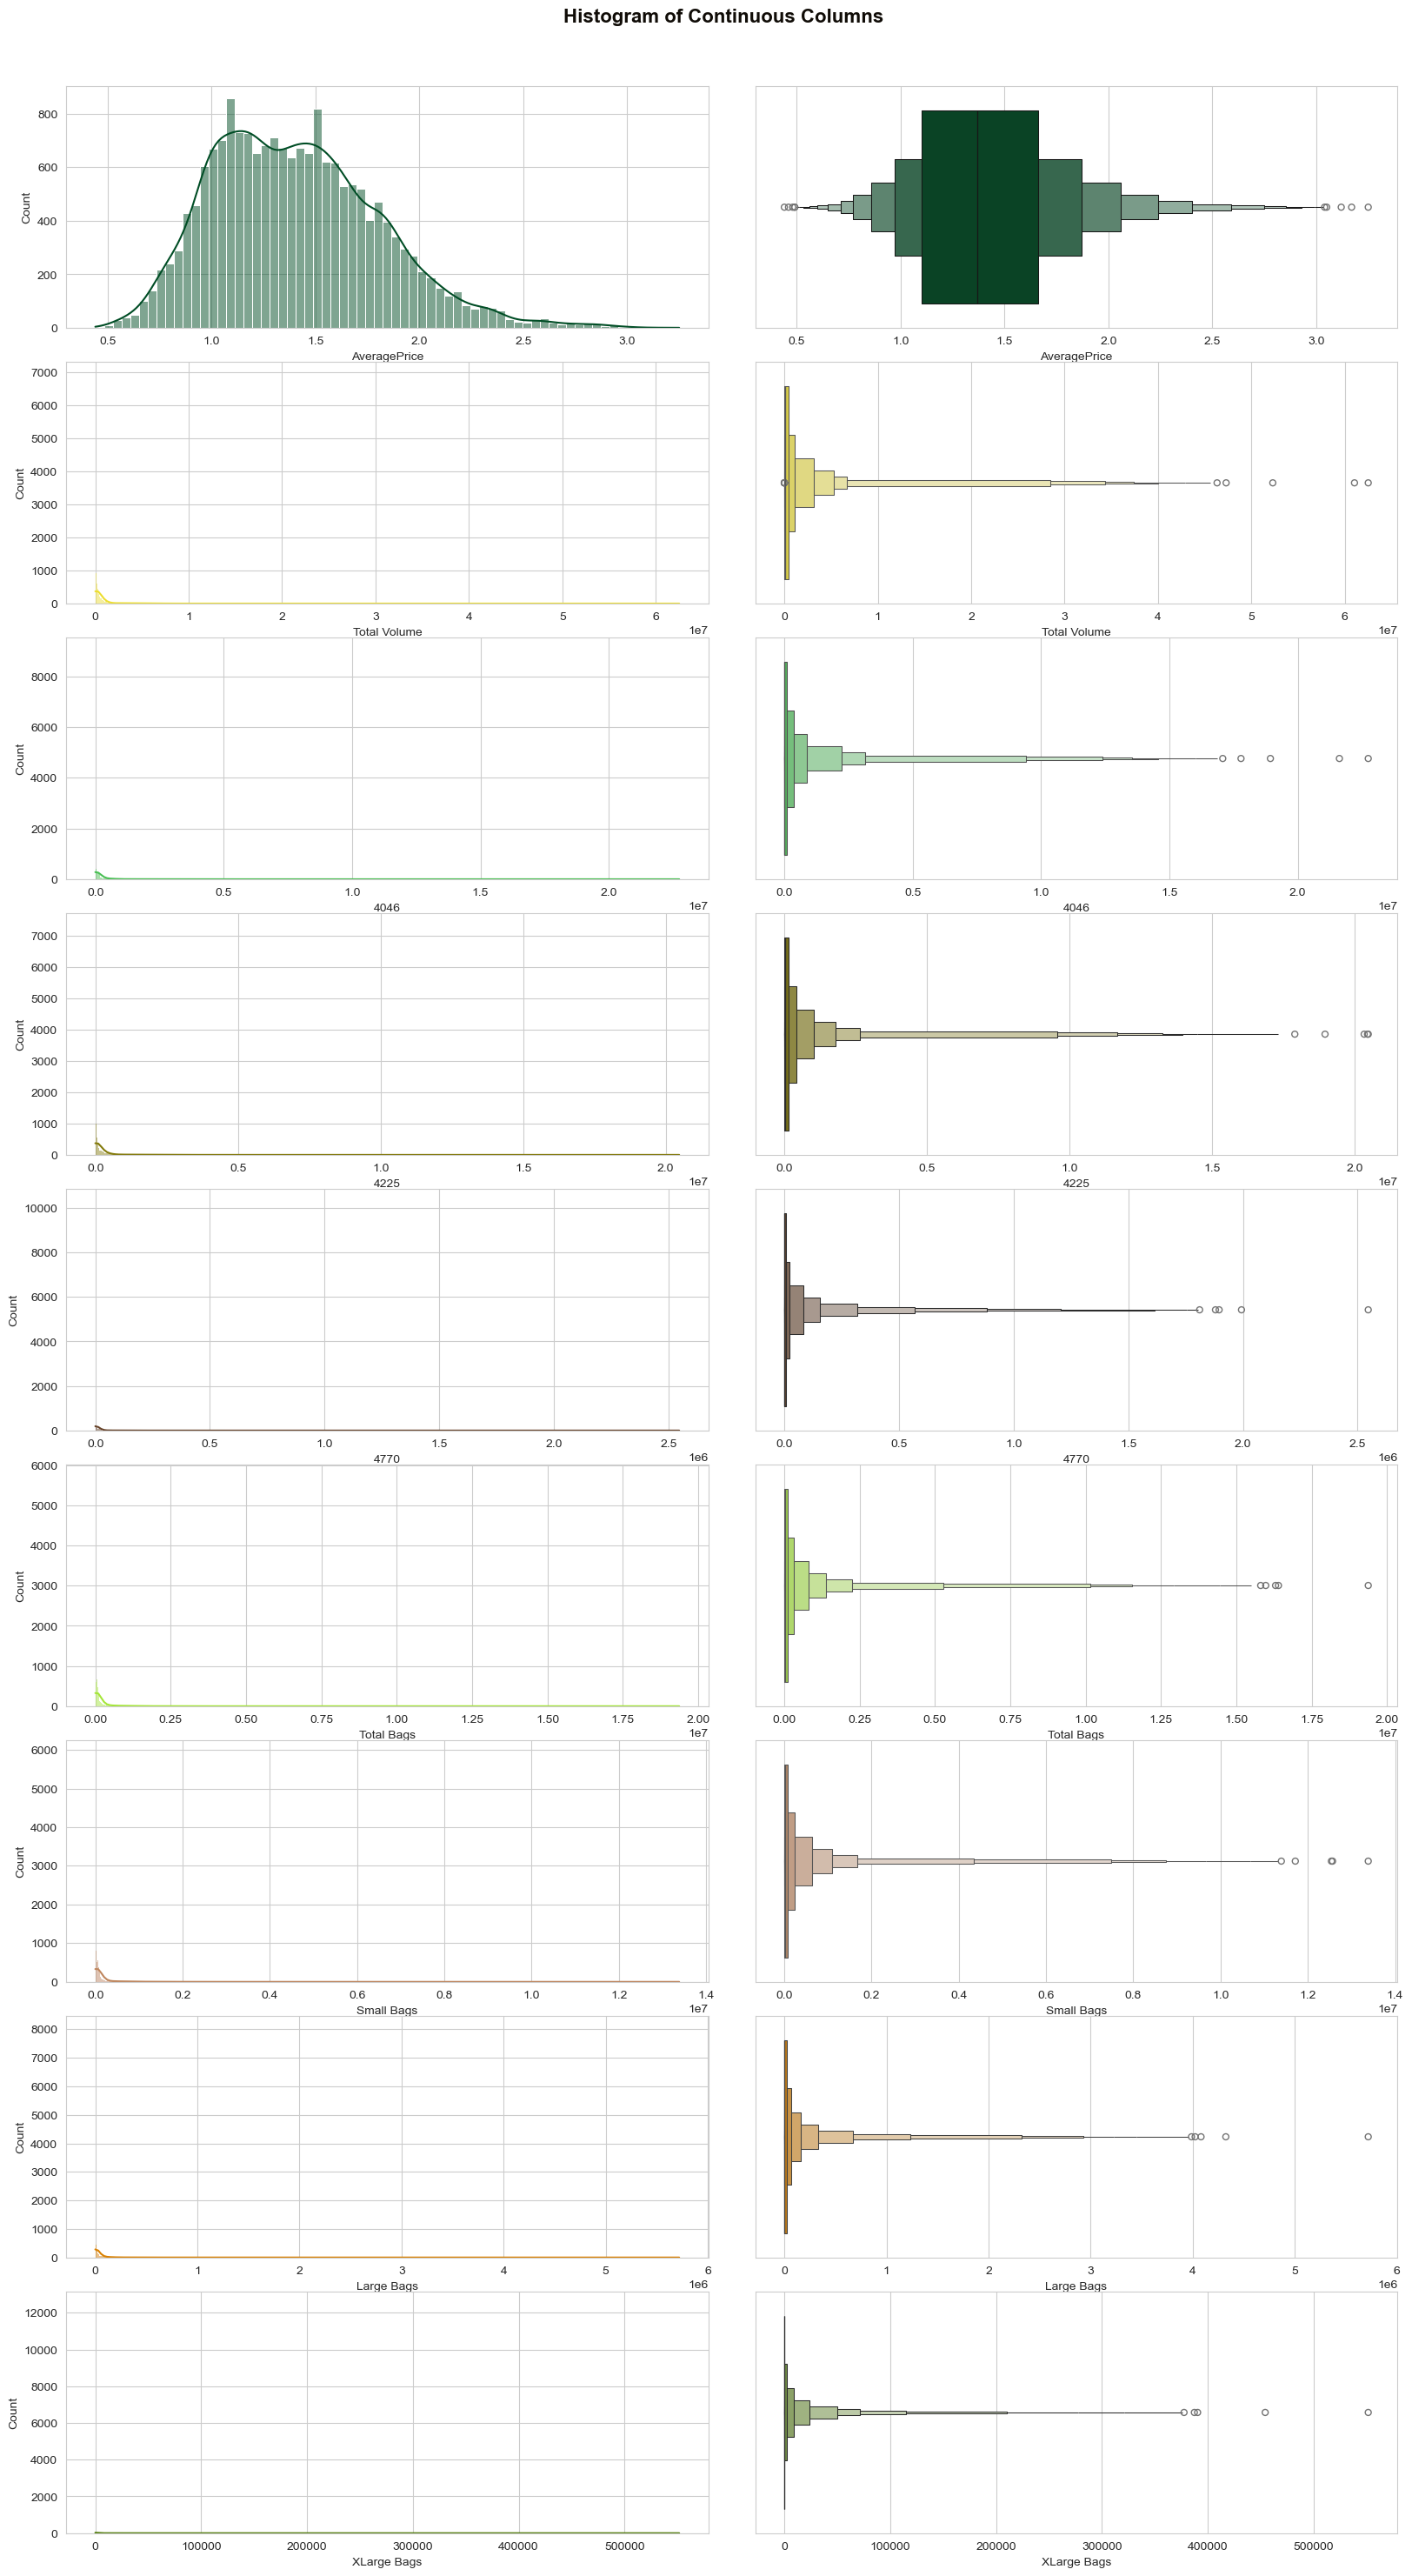

In [11]:
fig, axs = plt.subplots(9, 2, figsize = (16, 30))

# Title
fig.tight_layout()
fig.subplots_adjust(top = 0.95)
fig.suptitle('Histogram of Continuous Columns', fontweight = 'bold', fontsize = 16, fontfamily = 'sans-serif', 
             color = black_grad[0])

# Row 1
sns.histplot(data = ds, x = 'AveragePrice', kde = True, ax = axs[0, 0], color = '#004D25')
sns.boxenplot(data = ds, x = 'AveragePrice', ax = axs[0, 1], color = '#004D25')

# Row 2
sns.histplot(data = ds, x = 'Total Volume', kde = True, ax = axs[1, 0], color = '#EDDE30')
sns.boxenplot(data = ds, x = 'Total Volume', ax = axs[1, 1], color = '#EDDE30')

# Row 3
sns.histplot(data = ds, x='4046', kde = True, ax = axs[2, 0], color = '#48BF53')
sns.boxenplot(data = ds, x = '4046', ax = axs[2, 1], color = '#48BF53')

# Row 4
sns.histplot(data = ds, x = '4225', kde = True, ax = axs[3, 0], color = '#837A0B')
sns.boxenplot(data = ds, x = '4225', ax = axs[3, 1], color = '#837A0B')

# Row 5
sns.histplot(data = ds, x = '4770', kde = True, ax = axs[4, 0], color = '#664228')
sns.boxenplot(data = ds, x = '4770', ax = axs[4, 1], color = '#664228')

# Row 6
sns.histplot(data = ds, x = 'Total Bags', kde = True, ax = axs[5, 0], color = '#A4E637')
sns.boxenplot(data = ds, x = 'Total Bags', ax = axs[5, 1], color = '#A4E637')

# Row 7
sns.histplot(data = ds, x = 'Small Bags', kde = True, ax = axs[6, 0], color = '#BF865D')
sns.boxenplot(data = ds, x = 'Small Bags', ax = axs[6, 1], color = '#BF865D')

# Row 8
sns.histplot(data = ds, x = 'Large Bags', kde = True, ax = axs[7, 0], color = '#D98000')
sns.boxenplot(data = ds, x = 'Large Bags', ax = axs[7, 1], color = '#D98000')

# Row 9
sns.histplot(data = ds, x = 'XLarge Bags', kde = True, ax = axs[8, 0], color = '#557F0F')
sns.boxenplot(data = ds, x = 'XLarge Bags', ax = axs[8, 1], color = '#557F0F');

In [12]:
ds[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 
    'XLarge Bags']].skew(axis = 0, skipna = True)

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
dtype: float64

In [13]:
ds[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 
    'XLarge Bags']].kurt(axis = 0, skipna = True)

AveragePrice      0.325196
Total Volume     92.104458
4046             86.809113
4225             91.949022
4770            132.563441
Total Bags      112.272156
Small Bags      107.012885
Large Bags      117.999481
XLarge Bags     233.602612
dtype: float64

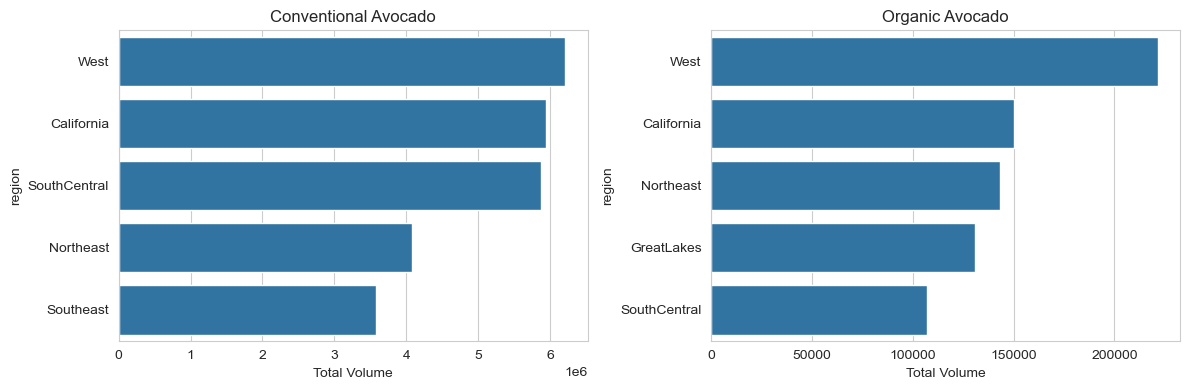

In [14]:
eda0 = (ds[ds['type']=='conventional']
        .query("region!='TotalUS'")
        .groupby('region')['Total Volume'].mean()
        .sort_values(ascending=False)
        .head(5))

eda1 = (ds[ds['type']=='organic']
        .query("region!='TotalUS'")
        .groupby('region')['Total Volume'].mean()
        .sort_values(ascending=False)
        .head(5))

df0 = eda0.reset_index(name='Total Volume')
df1 = eda1.reset_index(name='Total Volume')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(data=df0, x='Total Volume', y='region', order=df0['region'], ax=axes[0])
axes[0].set_title('Conventional Avocado')
sns.barplot(data=df1, x='Total Volume', y='region', order=df1['region'], ax=axes[1])
axes[1].set_title('Organic Avocado')
plt.tight_layout()
plt.show()

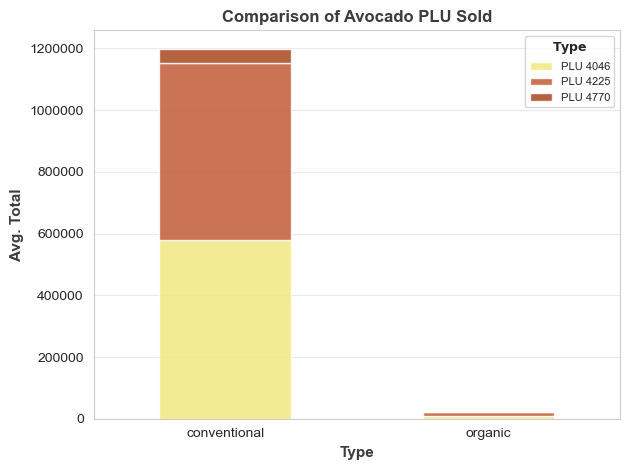

In [15]:
eda30 = (ds[['type', '4046', '4225', '4770']]
         .groupby('type', as_index=True)
         .mean())

colors = color_mix[-3:] if 'color_mix' in globals() else None

ax = eda30.plot(kind='bar', stacked=True, color=colors, alpha=0.85)
plt.title('Comparison of Avocado PLU Sold', fontweight='bold', fontsize=12, fontfamily='sans-serif', color=black_grad[1])
plt.xlabel('Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Avg. Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=['PLU 4046','PLU 4225','PLU 4770'], title='$\\bf{Type}$', fontsize=8, title_fontsize=9,
           loc='upper right', frameon=True)
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

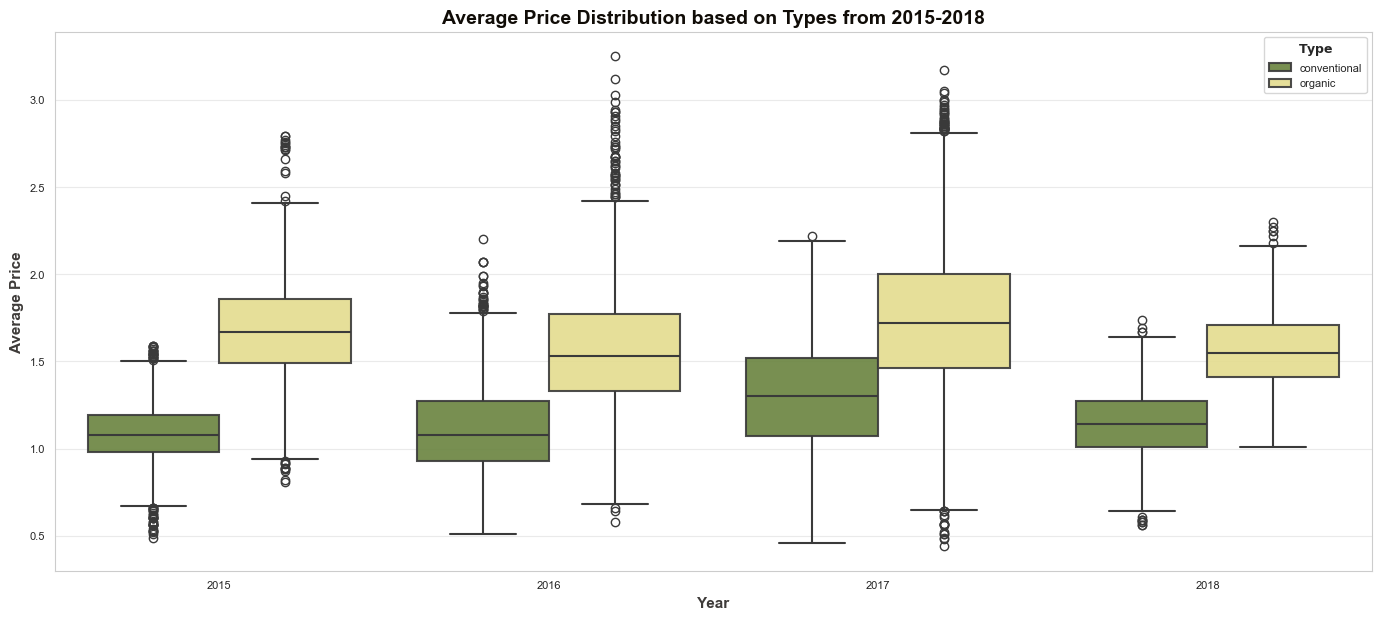

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
plt.title('Average Price Distribution based on Types from 2015-2018', fontweight='bold', fontsize = 14, 
          fontfamily = 'sans-serif', color = black_grad[0])
sns.boxplot(x = 'year', y = 'AveragePrice', hue = 'type', data = ds, ax = ax, palette = color_mix[1:3], 
            boxprops = dict(alpha = 0.9), linewidth = 1.5)
plt.xlabel('Year', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Average Price', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.legend(title = '$\\bf{Type}$', fontsize = 8, title_fontsize = 9, loc = 'upper right', frameon = True)
plt.grid(axis = 'y', alpha = 0.4)
plt.show()

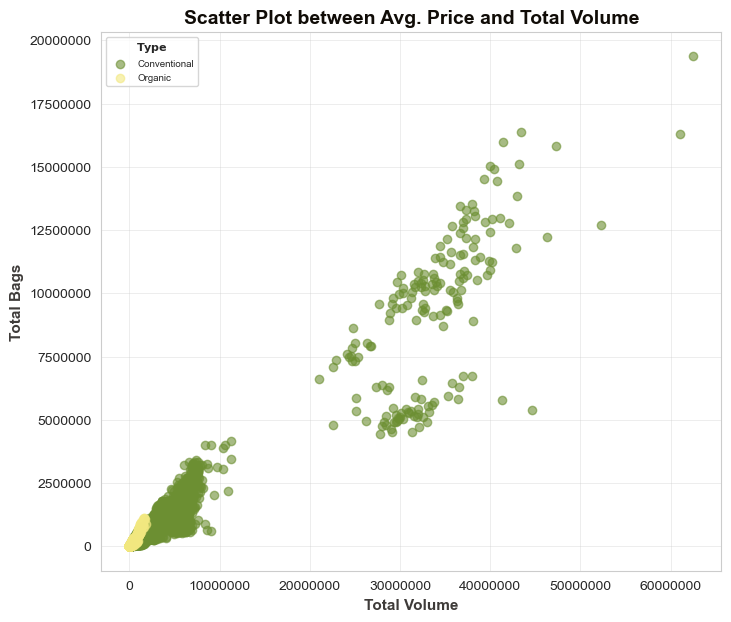

In [17]:
x0 = ds.xs('Total Volume', axis = 1)[ds.type == 'conventional']
x1 = ds.xs('Total Volume', axis = 1)[ds.type == 'organic']
y0 = ds.xs('Total Bags', axis = 1)[ds.type == 'conventional']
y1 = ds.xs('Total Bags', axis = 1)[ds.type == 'organic']

plt.figure(figsize = (8, 7))
plt.title('Scatter Plot between Avg. Price and Total Volume', fontweight = 'bold', fontsize = 14, 
          fontfamily = 'sans-serif', color = black_grad[0])
plt.scatter(x = x0, y = y0, c = color_mix[1], alpha = 0.6, linewidths = 1)
plt.scatter(x = x1, y = y1, c = color_mix[2], alpha = 0.6, linewidths = 1)
plt.legend(['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8, loc = 'upper left',
           frameon = True)
plt.xlabel('Total Volume', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total Bags', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ticklabel_format(style = 'plain', axis = 'both')
plt.grid(axis = 'both', alpha = 0.5, lw = 0.5)
plt.show()

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 90

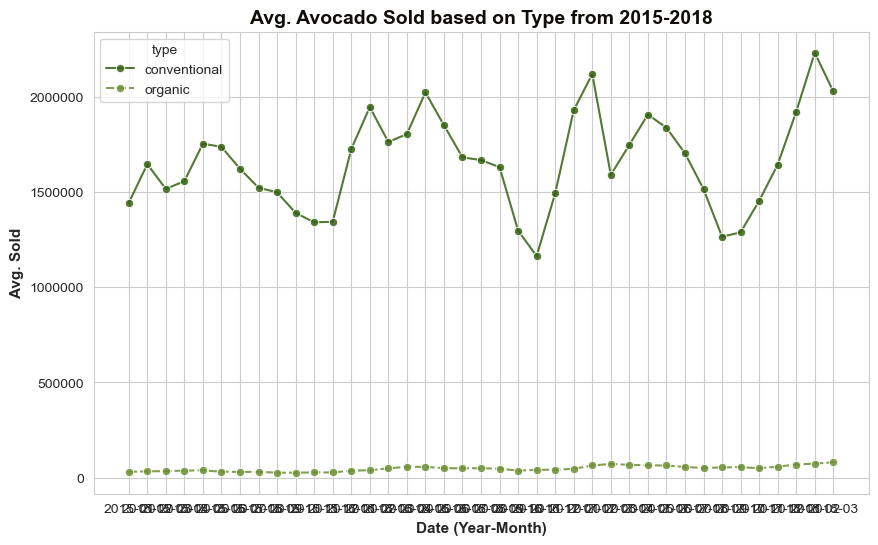

In [18]:
dseda8 = ds[['Date', 'Total Volume', 'type']]
dseda8['Date'] = pd.DatetimeIndex(dseda8['Date'])
dseda8['Date'] = dseda8['Date'].apply(lambda x: x.strftime('%Y-%m'))
group8 = dseda8.groupby(['Date', 'type'])
mnth_avg8 = group8.aggregate({'Total Volume': np.mean})

plt.figure(figsize = (10, 6))
plt.title('Avg. Avocado Sold based on Type from 2015-2018', fontweight = 'bold', fontsize = 14,
          fontfamily = 'sans-serif', color = black_grad[0])
sns.lineplot(data = mnth_avg8, x = 'Date', y = 'Total Volume', hue = 'type', style = 'type', markers = ['o', 'o'],
             palette = color_mix[0:2], alpha = 0.85)
plt.xlabel('Date (Year-Month)', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ylabel('Avg. Sold', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = '90', fontsize = 7)
plt.yticks(rotation = '45', fontsize = 7)
plt.grid(axis='y', alpha = 0.5, lw = 0.6)
plt.grid(axis='x', alpha = 0)
plt.legend(labels = ['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8, frameon=True);

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 90

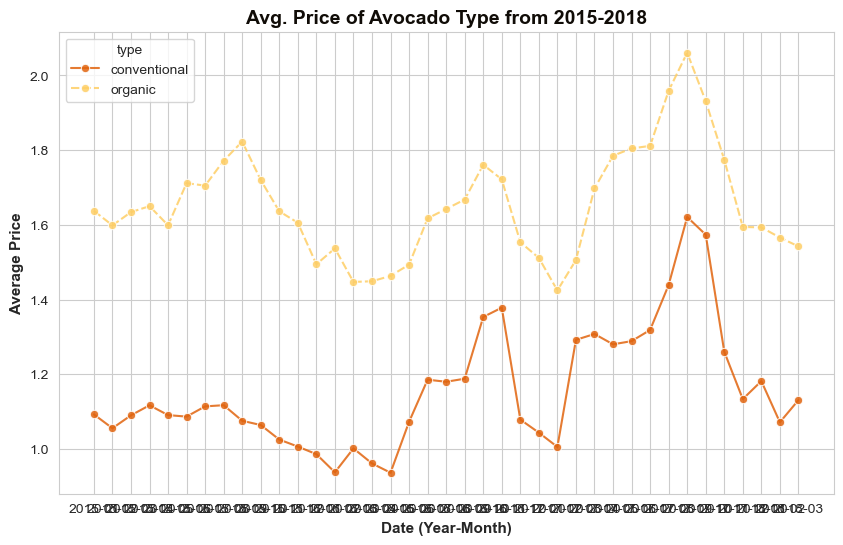

In [19]:
dseda9 = ds[['Date', 'AveragePrice', 'type']]
dseda9['Date'] = pd.DatetimeIndex(dseda9['Date'])
dseda9['Date'] = dseda9['Date'].apply(lambda x: x.strftime('%Y-%m'))
group9 = dseda9.groupby(['Date', 'type'])
mnth_avg9 = group9.aggregate({'AveragePrice': np.mean})

plt.figure(figsize = (10, 6))
plt.title('Avg. Price of Avocado Type from 2015-2018', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif',
          color = black_grad[0])
sns.lineplot(data = mnth_avg9, x = 'Date', y = 'AveragePrice', hue = 'type', style = 'type', markers = ['o', 'o'],
             palette = 'YlOrBr_r', alpha = 0.85)
plt.xlabel('Date (Year-Month)', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ylabel('Average Price', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = '90', fontsize = 7)
plt.yticks(fontsize = 7)
plt.grid(axis = 'y', alpha = 0.5, lw = 0.6)
plt.grid(axis = 'x', alpha = 0)
plt.legend(labels = ['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8,
           loc = 'upper left', frameon = True);

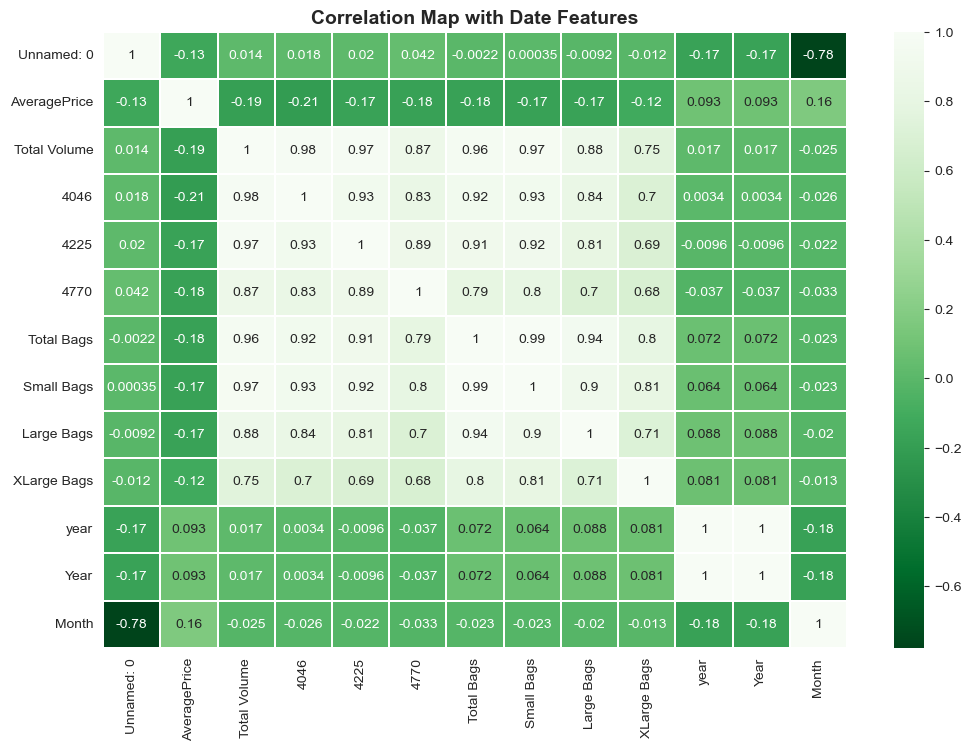

In [20]:
ds = pd.read_csv('avocado.csv', parse_dates=['Date'])
ds['Year'] = ds['Date'].dt.year
ds['Month'] = ds['Date'].dt.month
num = ds.select_dtypes(include=np.number)

plt.figure(figsize=(12,8))
sns.heatmap(num.corr(), annot=True, cmap='Greens_r', linewidths=0.1)
plt.title('Correlation Map with Date Features', fontsize=14, fontweight='bold', fontfamily='sans-serif')
plt.show()

In [22]:
ds.Date = pd.to_datetime(ds.Date)
ds['month'] = pd.DatetimeIndex(ds['Date']).month

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

ds['Date'] = pd.to_datetime(ds['Date'], errors='coerce')
ds['Year'] = ds['Date'].dt.year
ds['Month'] = ds['Date'].dt.month

X = ds.drop(['AveragePrice','Date'], axis=1)
y = ds['AveragePrice']

categorical_features = ['type','Year','region','Month']
numeric_features = [c for c in X.columns if c not in categorical_features]

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', RobustScaler(), numeric_features)
], remainder='drop')

model = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(random_state=123))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.4f}')

RMSE: 0.1263


In [30]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

try:
    from xgboost import XGBRegressor
    HAS_XGB = True
except:
    HAS_XGB = False

ds['Date'] = pd.to_datetime(ds['Date'], errors='coerce')
ds['Year'] = ds['Date'].dt.year
ds['Month'] = ds['Date'].dt.month

X = ds.drop(['AveragePrice','Date'], axis=1)
y = ds['AveragePrice']

categorical_features = [c for c in ['type','Year','region','Month'] if c in X.columns]
numeric_features = [c for c in X.columns if c not in categorical_features]

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', RobustScaler(), numeric_features)
])

candidates = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "RandomForest": RandomForestRegressor(random_state=123),
    "GradientBoosting": GradientBoostingRegressor(random_state=123)
}
if HAS_XGB:
    candidates["XGBoost"] = XGBRegressor(random_state=123, eval_metric='rmse', tree_method='hist')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

rows = []
for name, base_model in candidates.items():
    model = Pipeline([('preprocessing', preprocessor), ('regressor', base_model)])
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    r2 = r2_score(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    rows.append([name, r2, rmse])

results_df = pd.DataFrame(rows, columns=['Model','R2','RMSE']).sort_values('R2', ascending=False).reset_index(drop=True)
results_df

,Model,R2,RMSE
0,XGBoost,0.906606,0.122958
1,RandomForest,0.901424,0.126324
2,GradientBoosting,0.738427,0.205777
3,LinearRegression,0.638624,0.241868
4,Ridge,0.638454,0.241925
5,Lasso,0.014663,0.399385


In [2]:
from pycaret.regression import *
import pandas as pd

df = pd.read_csv('avocado.csv')
exp = setup(data=df, target='AveragePrice', session_id=123, ignore_features=['Date'])
best = compare_models(sort='R2')
best

,Description,Value
0,Session id,123
1,Target,AveragePrice
2,Target type,Regression
3,Original data shape,"(18249, 14)"
4,Transformed data shape,"(18249, 13)"
5,Transformed train set shape,"(12774, 13)"
6,Transformed test set shape,"(5475, 13)"
7,Ignore features,1
8,Numeric features,10
9,Categorical features,2


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0704,0.0106,0.1030,0.9341,0.0414,0.0522,0.4450
rf,Random Forest Regressor,0.0820,0.0138,0.1175,0.9143,0.0472,0.0608,1.2930
lightgbm,Light Gradient Boosting Machine,0.0975,0.0170,0.1303,0.8946,0.0529,0.0725,0.1490
dt,Decision Tree Regressor,0.1122,0.0293,0.1712,0.8182,0.0684,0.0822,0.0430
gbr,Gradient Boosting Regressor,0.1407,0.0352,0.1877,0.7815,0.0754,0.1047,0.6940
ada,AdaBoost Regressor,0.1901,0.0565,0.2377,0.6495,0.0985,0.1511,0.1860
knn,K Neighbors Regressor,0.1695,0.0576,0.2396,0.6430,0.0956,0.1255,0.2750
dummy,Dummy Regressor,0.3241,0.1617,0.4020,-0.0015,0.1653,0.2561,0.0170
par,Passive Aggressive Regressor,10.8337,2607.1000,44.7880,-16082.3572,1.2222,10.3866,0.2630


ExtraTreesRegressor(n_jobs=-1, random_state=123)

In [3]:
##위에 코드 실행하고 나면 계속 커널 재시작해야한다고 떠서 이 다음 코드들이 실행이 안됩니다.

In [ ]:
plot_model(best)

In [ ]:
plot_model(best, plot = 'error')

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
tuned_best = tune_model(best)

In [ ]:
plot_model(tuned_best)

In [ ]:
plot_model(tuned_best, plot = 'error')

In [ ]:
plot_model(tuned_best, plot = 'feature')

In [ ]:
rf = create_model('rf')

In [ ]:
plot_model(rf)

In [ ]:
plot_model(rf, plot = 'error')

In [ ]:
plot_model(rf, plot = 'feature')

In [ ]:
tune_rf = tune_model(rf)

In [ ]:
plot_model(tune_rf)

In [ ]:
plot_model(tune_rf, plot = 'error')

In [ ]:
plot_model(tune_rf, plot = 'feature')

In [ ]:
lgbm = create_model('lightgbm')

In [ ]:
plot_model(lgbm)

In [ ]:
plot_model(lgbm, plot = 'error')

In [ ]:
plot_model(lgbm, plot = 'feature')

In [ ]:
tune_lgbm = tune_model(lgbm)

In [ ]:
plot_model(tune_lgbm)

In [ ]:
plot_model(tune_lgbm, plot = 'error')

In [ ]:
plot_model(tune_lgbm, plot = 'feature')

In [ ]:
predict_model(best)

In [ ]:
predict_model(rf)

In [ ]:
predict_model(lgbm)

In [ ]:
final_best = finalize_model(best)

plot_model(best, plot='parameter')

In [ ]:
predict_model(final_best)

In [ ]:
save_model(final_best,'Final_Best_Model_caesarmario_06May2022')